In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Handle the data from the CSV
import csv

csv_data = []
with open('data/combined_tweets.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            csv_data.append(row)
            line_count += 1


Column names are tweet_id, user, text, date, retweets, replies, likes, quotes, has_viz


In [4]:
# Get all of the tweets for all users and split between noviz and viz
viz = []
no_viz = []

for tweet in csv_data :
    if tweet[-1] == "True":
        viz.append(int(tweet[6]))
    else:
        no_viz.append(int(tweet[6]))

In [5]:
data = [no_viz, viz]

In [6]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

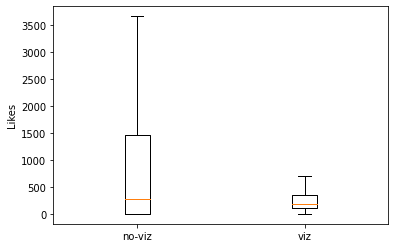

In [7]:
# Creating plot
plt.boxplot(data, notch=False, showfliers=False, labels=["no-viz", "viz"])
plt.ylabel("Likes")
 
# show plot
plt.show()

In [26]:
tweets = pd.read_csv("data/combined_tweets.csv")
tweets

,tweet_id,user,text,date,retweets,replies,likes,quotes,has_viz
0,1312029170772381697,BNONews,"RT @BNODesk: NEW: Trump is experiencing ""mild ...",10/02/2020 13:58:25,276,0,0,0,False
1,1323902358808649731,BNONews,"Republican David Andahl, who died from COVID-1...",11/04/2020 08:18:13,11392,2022,41170,25609,False
2,1353045636472516610,BNONews,RT @BNODesk: Legendary talk show host Larry Ki...,01/23/2021 18:23:12,106,0,0,0,True
3,1506774290993233925,BNONews,"RT @BNODesk: Stephen Wilhite, creator of the G...",03/23/2022 23:26:00,1118,0,0,0,False
4,1365736465876025349,CDCGov,Remember: When using household cleaners and di...,02/27/2021 18:52:02,62,20,156,5,True
...,...,...,...,...,...,...,...,...,...
1799,1513199483424854026,ScottGottliebMD,RT @StephenMcDonell: All provinces in #China h...,04/10/2022 16:57:25,332,0,0,0,False
1800,1513157130550972419,ScottGottliebMD,We should do more to make certain COVID booste...,04/10/2022 14:09:07,63,58,257,6,True
1801,1512604569351725058,ScottGottliebMD,"@ChristinaPushaw @BNONews Fair, sorry for taki...",04/09/2022 01:33:26,7,13,82,2,False
1802,1512583292847108099,ScottGottliebMD,RT @caroljoynt: There are fresh questions abou...,04/09/2022 00:08:54,4,0,0,0,False


<AxesSubplot:xlabel='has_viz'>

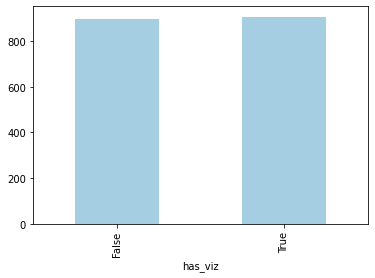

In [45]:
tweets[["has_viz","tweet_id"]].groupby("has_viz").agg(["count"]).plot(kind="bar",label='index',legend=None, colormap='Paired')
# plt.legend()

In [51]:
tweets[["has_viz","tweet_id"]].groupby("has_viz").agg(["count"]).reset_index()

,has_viz,tweet_id
,,count
0,False,896
1,True,908
